<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий ревьюера v1</h1>

Ольга привет! Меня зовут Дмитрий Пышненко, и я буду проверять твой проект. Предлагаю общаться на «ты» если ты не против 😊 Но если нет, то дай знать, и мы перейдем на "вы". 
    
Для своих комментариев я буду использовать цветовую разметку:

<div class="alert alert-success">
    <b>Успех:</b> все сделано правильно.
</div>
<div class="alert alert-warning">
    <b>Есть замечания:</b> так выделены небольшие замечания которые не критичны, но было бы здорово исправить. Если таких замечаний немного, то такой проект может быть принят.
</div>
<div class="alert alert-danger">
    <b>Нужно переделать:</b> есть замечания которые необходимо исправить или доделать для сдачи проекта.
</div>
    
Я буду поддерживать версионность комментариев, и при следующих итерациях я буду оставлять ячейки с новой версией v2 (v3 и.т.д.)"
    
Если у тебя есть вопросы, замечания или отвечаешь на комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии: 
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v1:</b>
    
<b>Общее впечатление:</b> 
    
- У тебя получилась отличная работа, поздравляю! Очень чистый код и структурированный подход к решению задачи. 
- Осталось исправить совсем чуть-чуть для сдачи проекта (буду также рад исправлениям желтых:):
    - Добавить дополнительную проверку данных.
    
Буду ждать новую версию на повторную проверку. Успехов!
    
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Комментарий ревьюера v2:</b>
    
Ольга привет! Очень здорово, что дополнительно поработала над проектом и внесла улучшения в него! 
    
Было интересно его проверять и осталось только пожелать тебе успехов на следующих спринтах 🍀
    
А тут можно найти больше примеров того, как проводить А/Б тестирование - 

https://habr.com/ru/company/boodet_online/blog/498688/
    
https://vc.ru/u/1174886-koptelnya/413265-chto-takoe-a-b-testirovanie-i-kak-provesti-ego-pravilno-urok-1    
 
     
</div>

# Описание проекта
Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

<div class="alert alert-warning">
<b>Комментарий ревьюера v1:</b>
    
Дополнительно было бы здорово оставить более подробное описание проекта, данных и задач. Описание проекта важная часть работы так как она дает вводные для стороннего читателя (будь то коллега-ревьюер или же бизнес-заказчик). На данном этапе также полезно выполнять декомпозицию задачи.



In [1]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt

## Приоритизация гипотез

Файл /datasets/hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Посмотрим на данные и при необходимости подготовим их для расчёта нужных нам показателей

In [2]:
# зададим переменную и посмотрим на данные
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')

hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
# переименуем столбцы
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [4]:
# посмотрим на результат
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
# посчитаем в отдельном столбце показатель ICE и посмотрим на результат
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['ice'] = hypothesis['ice'].astype('int')

hypothesis.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13
7,Добавить форму подписки на все основные страни...,10,7,8,5,11
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1


### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [6]:
# посчитаем в отдельном столбце показатель RICE и посмотрим на результат
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['rice'] = hypothesis['rice'].astype('int')

hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11,112
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13,40
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8,40
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16,16
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1,9
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2,4
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1,4
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1,3


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v1:</b>
    
Можно добавить следующий код, чтобы отобразить все данные в таблицах: 
    
    pd.options.display.max_colwidth = 210


### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

Топ - гипотез по ICE: 8, 0, 7.

Топ - гипотез по RICE: 7, 2, 0.

При использовании ICE не учитывается одна из важной составляющей оценки гипотез - охват изменений (Reach), именно это и определяет разницу в итоговых приоритетах гипотез. Гипотеза 7 заняла первое место, поскольку затронет всех пользователей сайта.

Таким образом, для нас наиболее приоритетными гипотезами будут 7, 2, 0 (по RICE).

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Отлично! Все выполнено правильно. Фреймворки `ICE` и `RICE` были рассчитаны верно. И по результатам теперь понятно, как фактор охвата (Reach) влияет на общую ценность гипотезы.

Дополнительно было бы совсем здорово создать точечную диаграмму, чтобы сопоставить все метрики для каждой гипотезы и сравнить их.
    
Для стороннего читателя (например бизнес-заказчик) также было бы интересно добавить краткое описание фреймворков и как они работают.
    
Интересные примеры использования данных методов можно почитать тут:
    
- https://habr.com/ru/company/hygger/blog/424323/ 
- https://vc.ru/tribuna/260086-kak-delat-to-chto-prineset-bolshe-polzy-biznesu-i-ne-kosyachit-so-srokami    

## Анализ A/B-теста

Файл /datasets/orders.csv

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Посмотрим на данные и при необходимости подготовим их для использования в дальнейшем анализе

In [7]:
# зададим переменную и посмотрим на общую информацию о датасете
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
# исправим тип данных в date
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [9]:
# переименуем столбцы
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [10]:
# посмотрим на результат
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Теперь тут всё хорошо. Переходим к следующему датасету.

In [11]:
# зададим переменную и посмотрим на общую информацию о датасете
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
# исправим тип данных в date
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [13]:
# посмотрим на результат
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Теперь и здесь всё в порядке, можно переходить дальше!

In [14]:
# определим минимальные и максимальные даты в каждом из датасетов
print(f"Минимальная дата в датасете orders: {orders['date'].min()}")
print(f"Минимальная дата в датасете visitors: {visitors['date'].min()}")
print(f"Максимальная дата в датасете orders: {orders['date'].max()}")
print(f"Максимальная дата в датасете visitors: {visitors['date'].max()}")

Минимальная дата в датасете orders: 2019-08-01 00:00:00
Минимальная дата в датасете visitors: 2019-08-01 00:00:00
Максимальная дата в датасете orders: 2019-08-31 00:00:00
Максимальная дата в датасете visitors: 2019-08-31 00:00:00


Даты совпадают - отлично! Запомним и позже используем в графиках.

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера v1:</b>

Дополнительно было бы интересно проверить доступные данные:
- Проверить не попадают ли у нас пользователи в обе группы и принять решение о том, что с ними делать.
- Количество уникальных групп и распределение по ним.

Оценим размер групп и распределение по ним

In [15]:
# сбор уникальных пользователей по группам
group_a = orders[orders['group'] == 'A']['visitor_id'].unique() 
group_b = orders[orders['group'] == 'B']['visitor_id'].unique()

print(f'Размер группы А : {len(group_a)}')
print(f'Размер группы B : {len(group_b)}')
print(f'Разница между группами : {int((len(group_b) / len(group_a) - 1)*100)}%')
print(f'Уникальные группы: {orders["group"].unique()}')

Размер группы А : 503
Размер группы B : 586
Разница между группами : 16%
Уникальные группы: ['B' 'A']


- Размеры групп разные - группа B больше на 83 пользователя (16%) - это много!
- Неоднородность распределения может повлиять на итоговую конверсию - возможно, пользователи группы B делали больше заказов
- Работаем с тем, что имеем, так как тест уже проведен

Проверим, не попадают ли у нас пользователи в обе группы

In [16]:
# intersect1d находит пересечение двух массивов
# нас же интересует длина возвращаемого массива
suspicious_visitors = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), 
                                orders.query('group == "B"')['visitor_id'].unique())

print(f'Одновременно в обе группы попало {len(suspicious_visitors)} пользователей')

Одновременно в обе группы попало 58 пользователей


58 пользователей, чьи заказы входят в обе группы, будут в дальнейшем искажать результаты анализа тестирования - уберём их!

In [17]:
orders = orders[~orders['visitor_id'].isin(suspicious_visitors)]

In [18]:
# посчитаем количество уникальных пользователей без "подозрительных пользователей"
# сбор уникальных пользователей по группам
a_without_suspicious_visitors = orders[orders['group'] == 'A']['visitor_id'].unique() 
b_without_suspicious_visitors = orders[orders['group'] == 'B']['visitor_id'].unique()

In [19]:
print(f'Итоговое количество уникальных пользователей : {len(suspicious_visitors) + len(a_without_suspicious_visitors) + len(b_without_suspicious_visitors)} ')

Итоговое количество уникальных пользователей : 1031 


<div class="alert alert-info"> <b>Комментарий студента:</b> Добавила дополнительную проверку на принадлежность пользователей к обеим группам. Проанализирован состав групп, дополнены выводы. Ниже также исправлены персентили - на новых данных значения несколько иные, но на общие выводы и на результат это никак не повлияло.</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v2:</b>
    
Все твои комментарии верные. В целом ситуация с пользователями в двух группах неприятная и на реальном проекте стоит узнать у того кто собирал данные, что пошло не так. В данном случае пользователей не так много поэтому их также можно оставить как есть, плюс мы не можем их полностью убрать из visitors.

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [20]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [21]:
# собираем куммулятивные данные в разные переменные
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group'])]
                              .agg({'date' : 'max', 
                                    'group' : 'max', 
                                    'transaction_id' : 'nunique', 
                                    'visitor_id' : 'nunique', 
                                    'revenue' : 'sum'
                                    }), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                         visitors['group'] == x['group'])]
                                .agg({'date': 'max',
                                      'group': 'max',
                                      'visitors': 'sum'
                                     }), axis=1).sort_values(by=['date', 'group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# посмотрим на результат
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

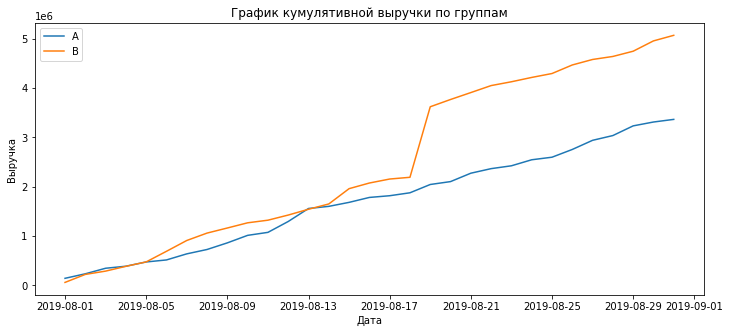

In [23]:
# график кумулятивной выручки по группам

plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend();

- Для группы А характерен равномерный рост выручки практически весь месяц.
- Группа B на графике стабильно показывает бОльшую выручку, чем группа А. Стоит заметить, что с 18 августа в группе B наблюдается скачок выручки, что может может объясняться возросшим количеством заказов, наличием дорогих товаров в заказах или и тем, и другим одновременно.
- Резюмируя: на данный момент группа B лидирует.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Верные результаты и выводы! 


### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

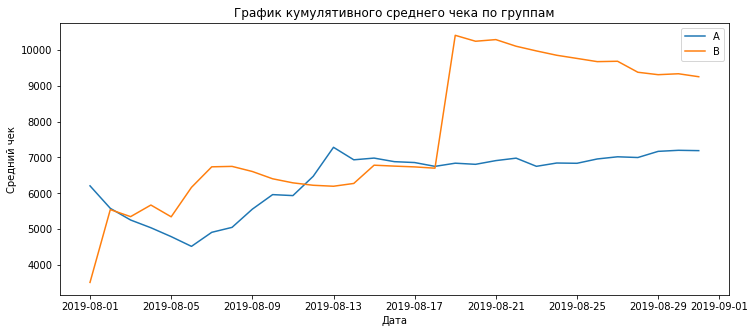

In [24]:
# график кумулятивного среднего чека по группам

plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend();

- До 14.08.2019 наблюдается абсолютно разное поведение среднего чека у двух групп, но стоит отметить, что средний чек группы B почти всё время был выше.
- Также наблюдается реактивный скачок в группе B, который мы уже видели чуть выше, с дальнейшей стабилизацией кривых. Можно предположить, что были очень крупные заказы, которые могут влиять на результаты.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Здесь также все верно.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [25]:
# соберём необходимые данные в отдельную переменную
mergedCumulativeRevenue  = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                    left_on='date', 
                                                    right_on='date', 
                                                    how='left', 
                                                    suffixes=['A', 'B'])
# посмотрим на результат
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


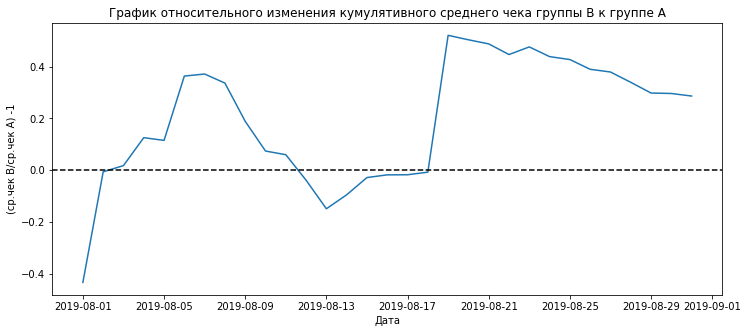

In [26]:
# график относительного изменения кумулятивного среднего чека группы B к группе A

plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeRevenue['date'], 
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1);
plt.axhline(y=0, color='black', linestyle='--');
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('(ср.чек В/ср.чек А) -1')
plt.show()


- График резко "ломается" в нескольких точках - определённо,  присутствуют выбросы (крупные заказы) в эти даты.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Действительно, было бы полезно изучать данные без выбросов.

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [27]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

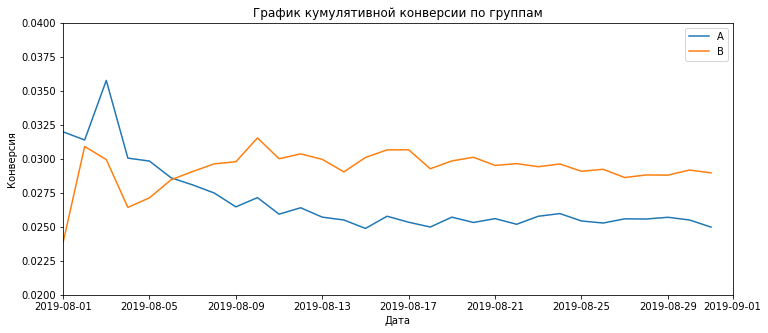

In [28]:
# график кумулятивной конверсии по группам

plt.figure(figsize=(12,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.tick_params(axis='x', which='major', labelsize=10)
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.02, 0.04])
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.show()

- В начале месяца обе группы заметно нестабильны, но к концу месяца колебания в группах затихают
- В целом, конверсия у группы В оказалась стабильно лучше группы А.

<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>
    
Верные результаты и выводы, а на основании данного графика легче сказать, что группа B действительно лучше.

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

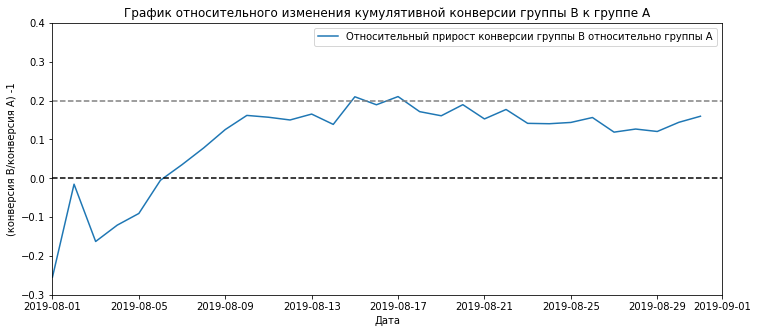

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])
# график относительного изменения кумулятивной конверсии группы B к группе A

plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.4])
plt.tick_params(axis='x', which='major', labelsize=10)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('(конверсия В/конверсия А) -1')
plt.show()

- В конце первой недели конверсия группы B стала стабильно больше конверсии группы А

<div class="alert alert-success">
<b>Комментарий ревьюера v1:</b>
    
На мой взгляд тут уже можно отметить небольшую стаблизацию результатов теста после около определенного значения после 21.08
    
    
Отлично, что используешь plt.axhline. 

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [30]:
ordersByUsers = (orders.groupby('visitor_id', as_index=False)
                       .agg({'transaction_id': pd.Series.nunique}))
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


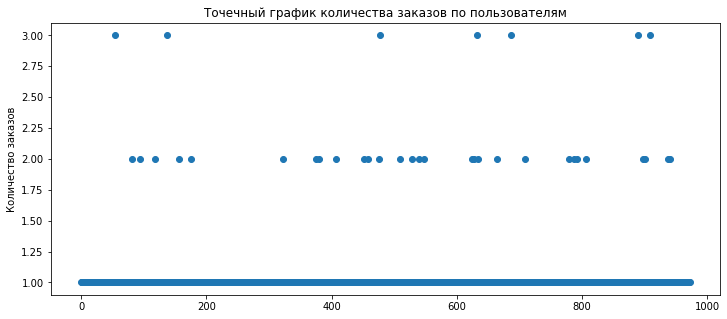

In [31]:
# точечный график количества заказов по пользователям

plt.figure(figsize=(12,5))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.show()

- Судя по графику большинство пользователей оформляли заказ единожды.
- В целом большинство пользователей не совершает более 2 заказов.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [32]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


- Не более 5% пользователей совершали больше 1 заказа.
- Не более 1% пользователей совершали больше 2 заказов.
- За границу для определения аномальных пользователей примем 2 заказа на одного пользователя.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

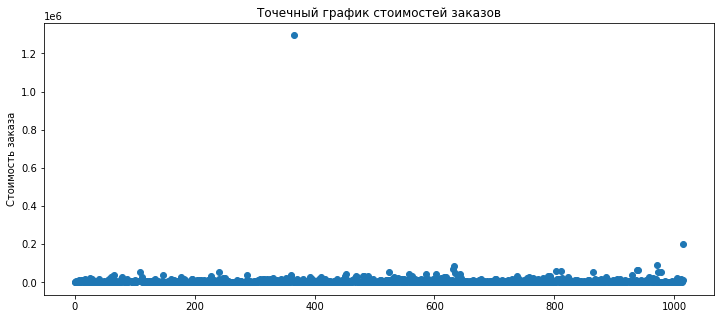

In [33]:
# точечный график стоимостей заказов

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,5))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.show()

- На графике замечен  самый крупный заказ на сумму свыше 1 миллиона - явная аномалия по сравнению с другими.
- Следующий за ним крупный заказ в районе 200000 ед., что также является аномалией.
- Все остальные заказы значительно дешевле

Посмотрим на графики поближе

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Можно также выделить две группы на этом графике, используя параметр hue:  (https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
  
А также посмотреть на график без выбросов.

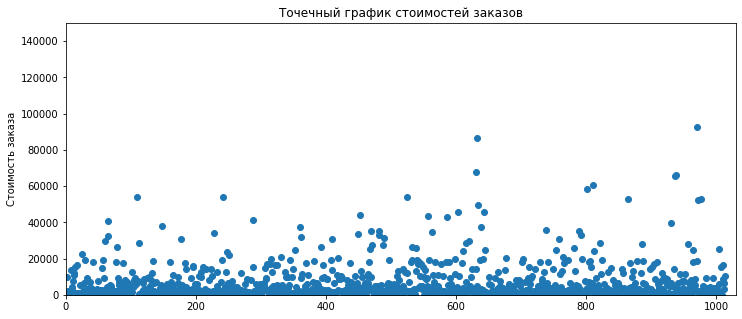

In [34]:
# точечный график стоимостей заказов с увеличенным масштабом

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12,5))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1030, 0, 150000])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.show()

- Большая часть пользователей делает покупки суммой стоимостью не более 30000 ед.. 

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [35]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


- Не больше 5% заказов дороже ~27 тыс. ед.
- Не больше 1% - дороже 53 904 ед.
- За границу для определения аномальных заказов примем 27 тыс. ед.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Диаграммы рассеяния и выбросы по 90, 95 и по 99 персентилю определены полностью верно.

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

Сформируем нулевую и альтернативную гипотезы для проверки

- H0: Нулевая гипотеза - различий в конверсии между группами нет.
- H1: Альтернативная гипотеза - различия в конверсии между группами есть.

In [36]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                                     .agg({'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                     .agg({'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']]
                                 .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),
    axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]
                                 .agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),
    axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

data = (
    ordersADaily
    .merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))

# для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (orders[orders['group'] == 'A']
                                              .groupby('visitor_id', as_index=False)
                                              .agg({'transaction_id': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B']
                                              .groupby('visitor_id', as_index=False)
                                              .agg({'transaction_id': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders'] 

# пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [37]:
print(f'p-value: {"{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])}')
print(f'Относительный прирост конверсии: {"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)}')

p-value: 0.01102
Относительный прирост конверсии: 0.160


- P-value = 0.01102 < 0.05 (критический уровень статистической значимости).
- Отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет.
- Относительный прирост конверсии группы В к конверсии группы А равен 16%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Сформируем нулевую и альтернативную гипотезы для проверки

- H0: Нулевая гипотеза - различий в среднем чеке между группами нет.
- H1: Альтернативная гипотеза - различия в среднем чеке между группами есть.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Гипотезы сформулированы верно.

In [38]:
p_val = '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1])

diff = '{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue']
                       .mean()-1)

print(f'p-value: {p_val}')
print(f'Относительное различие среднего чека: {diff}')

p-value: 0.829
Относительное различие среднего чека: 0.287


- P-value > 0,05 (критический уровень статистической значимости).
- Cтатистически значимых отличий в среднем чеке между группами нет.
- Относительное различие среднего чека между сегментами - 28,7%.

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Исходя из анализа ранее подавляющее большинство пользователей не делает более 2 заказов и сумма одной покупки в большинстве случаев не превышает 27 тыс. ед.

Очистим данные от аномальных пользователей.

In [39]:
# пользоватиели с большим количеством заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

# пользователи с дорогими заказами
usersWithExpensiveOrders = orders[orders['revenue'] > 27000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(f'Количество аномальных пользовтелей: {abnormalUsers.shape[0]}') 

Количество аномальных пользовтелей: 58


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v1:</b>
    
Было бы совсем здорово не харкодить границы аномалий. Тут можно использовать код для расчета выбросов или переменную со значением. Это поможет избежать ошибок в будущем, особенно если проект нужно будет прогнать на новых данных.

Гипотезы сформулированы верно.

In [40]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [41]:
print(f'p-value: {"{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])}')
print(f'Относительный прирост конверсии: {"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)}') 

p-value: 0.01235
Относительный прирост конверсии: 0.182


- Аномальные пользователи - те, кто совершил 3 заказа и более, или совершил заказ на сумму свыше 27 тыс. ед.
- Аналогично сырым данным, p-value не превысил 0,05, а значит, нулевую гипотезу отвергаем - между конверсиями групп А и В по-прежнему есть статистически значимая разница.
- Сегмент В оказался лучше по конверсии на 18,2%.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [42]:
p_val_clean = '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )

diff_clean = "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )

print(f'p-value: {p_val_clean}')
print(f'Относительное различие среднего чека: {diff_clean}')

p-value: 0.646
Относительное различие среднего чека: -0.048


<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера v1:</b>
    
Было бы здорово подписать что означает второе число.


- P-value оказался примерно на том же уровне - 0,646, как и с сырыми данными
- Нулевую гипотезу отвергнуть нельзя
- Средний чек у группы A превосходит средний чек у группы B на 4.8% в "очищенных" данных.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
Верные выводы для всех тестов!

### Примите решение по результатам теста и объясните его.

Варианты решений:
- 1. Остановить тест, зафиксировать победу одной из групп.
- 2. Остановить тест, зафиксировать отсутствие различий между группами.
- 3. Продолжить тест.

# Результаты теста

- Из графика различия конверсии между группами видно, что результаты группы B стабильно лучше группы A.

- Из колебаний на графике различия среднего чека зафиксировано наличие аномалий.

- Выявлено статистически значимое различие по конверсии между группами и по исходным, и по отфильтрованным от аномалий данным.

- Статистически значимое различие по среднему чеку не были выявлены в обоих случаях.

Резюмируя: тест следует остановить и признать его успешным - лидирует группа В. Средний чек не стал выше, но значительно увеличилась конверсия.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера v1:</b>
    
    
Спасибо за проделанную работу 🤝

Ты провела отличное исследование с правильными промежуточными выводами, чистым кодом и хорошей визуализацией. У тебя получилось верно применить фреймворки для тестирования гипотез, выявить аномалии в данных и провести все статистические проверки. 
    
Также полностью согласен с твоими итогами теста. В данном проекте можно попасть в "ловушку подглядывания" и ждать пока появится разница в средних чеках, но делать так неправильно. Подробнее почитать можно тут: https://gopractice.ru/how-not-to-analyze-abtests/
    

Спасибо за классный проект и буду ждать твой проект на повторное ревью 😉
    

<div class="alert alert-warning">
<b>Комментарий ревьюера v1:</b>
    
Тем не менее общие выводы в данном случае это мини-презентация всей работы перед бизнес-заказчиком. На реальном проекте это, возможно, единственное, что бизнес будет читать. Поэтому необходимо структурировано указывать развернутые комментарии ко всем выводам, которые ты получила по каждому пункту работы.
